### Here is a short documentation on data storytelling part of my capstone project on "*Used Car DataBase*".

I may come up with few interesting questions while doing analysis on my dataset. Before moving to those interesting questions and analysis, I just want to list the columns that this dataset contains. Dataset consists of 371528 rows and 20 columns [ dateCrawled, name, seller, offerType, price, abtest, vehicleType, yearOfRegistration, gearbox, powerPS, model, kilometer, monthOfRegistration, fuelType, brand, notRepairedDamage, dateCreated, nrOfPictures, postalCode, lastSeen ].

In [22]:
# Importing python packages
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import csv

sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})

#Importing and reading CSV file
file_input = 'C:\\Users\\Sneha Rani\\autos.csv'
df1 = pd.read_csv(file_input, encoding='latin-1', index_col=None)

# Filling missing values
df1['vehicleType'].fillna(value='not-available', inplace=True)
df1['gearbox'].fillna(value='not-available', inplace=True)
df1['model'].fillna(value='not-available', inplace=True)
df1['fuelType'].fillna(value='not-available', inplace=True)
df1['notRepairedDamage'].fillna(value='not-available', inplace=True)

# Removing the timestamp from a datetime in datadrame
df1['dateCreated'] = pd.to_datetime(df1['dateCreated'])

      
# scaled feature in a 'kilometer' column
df1['kilometer'] = df1['kilometer']/1000


# Removing records with 'zero' price value
df2 = df1[df1['price']!=0].reset_index(drop = True)
df2.head()

Populating the interactive namespace from numpy and matplotlib


,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,not-available,1993,manuell,0,golf,150.0,0,benzin,volkswagen,not-available,2016-03-24,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,not-available,125.0,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125.0,8,diesel,jeep,not-available,2016-03-14,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150.0,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90.0,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06 10:17:21


In [4]:
# Count of unique values for each column
df2.apply(lambda x: len(x.unique()))

dateCrawled            274635
name                   225034
seller                      2
offerType                   2
price                    5596
abtest                      2
vehicleType                 9
yearOfRegistration        145
gearbox                     3
powerPS                   785
model                     252
kilometer                  13
monthOfRegistration        13
fuelType                    8
brand                      40
notRepairedDamage           3
dateCreated               114
nrOfPictures                1
postalCode               8146
lastSeen               178250
dtype: int64

**dateCrawled (280500), name (233531), lastSeen (182806)** columns have too many unique values. Challenges with such data are that it will complicate learning model and resulted model may not generalize well on new data.

### Exploratory Data Analysis on some fields of 'Used Car Database'

privat        360747
gewerblich         3
Name: seller, dtype: int64


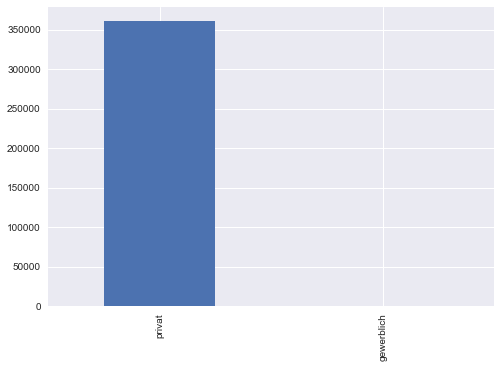

In [5]:
# Plot graph of seller
df2['seller'].value_counts().plot(kind='bar')

# Total count of unique values
print(df2['seller'].value_counts())

*From the above bar graph of **seller**, this column has 2 unique values and “gewerblich” value has only 3 records. This column has no distinguishing information for the model. So, this column can be dropped as it may not be an influencing feature for the model.*

Angebot    360744
Gesuch          6
Name: offerType, dtype: int64


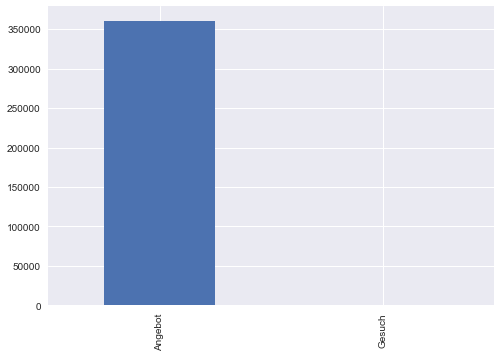

In [6]:
# Plot graph of offerType
df2['offerType'].value_counts().plot(kind='bar')

# Total count of unique values
print(df2['offerType'].value_counts())

*From the above bar graph of **offerType**, this column has 2 unique values and “gesuch” value has only 12 records which is insignificant when we think of this feature impacting the price of the car. So, this column can be dropped.*

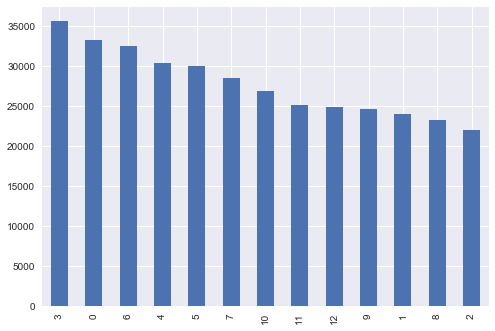

In [7]:
# Plot graph of monthOfRegistration
df2['monthOfRegistration'].value_counts().plot(kind='bar')

**monthOfRegistration** column should have 12 unique values. However, based on bar graph it has 13 unique values which is not correct. Also, dataset has yearOfRegistration column. So, this column can be dropped.

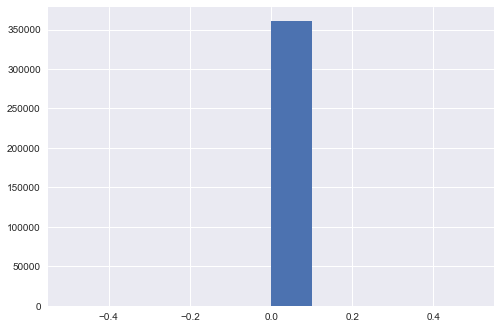

In [8]:
# Plot graph of nrOfPictures
df2['nrOfPictures'].hist()

*Above histogram of **nrOfPictures** column says that this column has only one value and it has no meaning for model and visualization. This column can be dropped.*

test       186880
control    173870
Name: abtest, dtype: int64


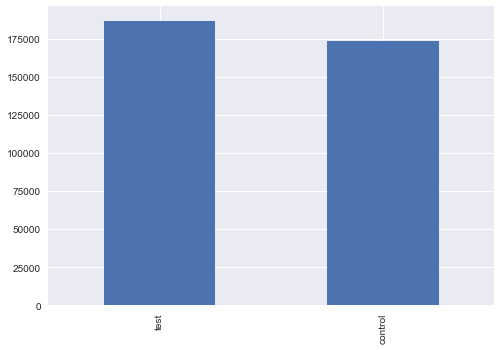

In [9]:
# Plot graph of abtest
df2['abtest'].value_counts().plot(kind='bar')

# Total count of unique values
print(df2['abtest'].value_counts())

*From the above bar graph of **abtest**, this column has two values 'test' and 'control' which does not give any more information on how this feature is related to used car or pricing. It has no relevance for the analysis and can be dropped.*

114

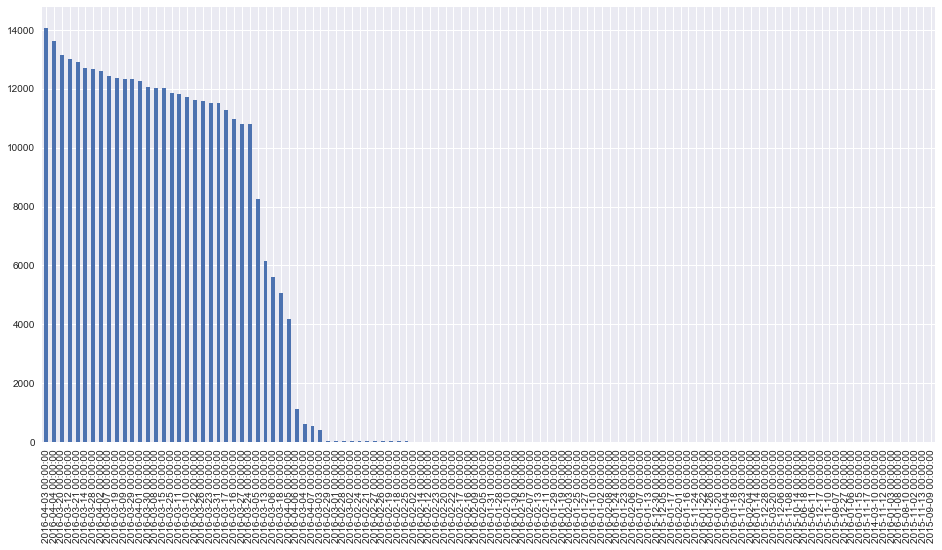

In [21]:
# Plot graph of dateCreated
plt.figure(figsize=(16,8))
dateCreated_count = df2['dateCreated'].value_counts().plot(kind='bar')
dC = dateCreated_count.set_xticklabels(dateCreated_count.get_xticklabels(), rotation=90)
# Total count of unique values
len(df2['dateCreated'].unique())

***dateCreated*** *column has 114 unique values. This column has no distinguishing information for the model. So, this column can be dropped.*

#### What is the average price of the car based on vehicleType ?

In [11]:
avg_price= df2.pivot_table(values=["price"], index=['vehicleType'], aggfunc=np.mean)
print(avg_price)

                       price
vehicleType                 
andere         720695.185737
bus             10452.253687
cabrio          15292.173537
coupe           26703.163520
kleinwagen       5826.302574
kombi            7912.791616
limousine       11359.258957
not-available   22345.811762
suv             13430.022687


#### Can we find out the min, max and average price of the car of different brands ?

In [12]:
group_brands = df2.groupby('brand').agg({"price": [min, max, mean]}) 
# Using ravel, and a string join, we can create better names for the columns:
group_brands.columns = ["_".join(x) for x in group_brands.columns.ravel()]
group_brands

,price_min,price_max,price_mean
brand,,,
alfa_romeo,1,74185296,36999.409713
audi,1,99999999,16306.013191
bmw,1,99999999,15263.303998
chevrolet,1,999999,7655.222841
chrysler,1,37500,4117.356264
citroen,1,27322222,9089.353743
dacia,1,19990,5905.268539
daewoo,1,4200,1034.998124
daihatsu,1,12850,1761.402581


*As we see car prices vary from **1 to 99999999** and has varied average price. Prices as low as **1** and as high as **999999999** does not define well for the model. It needs to be cleaned further and we need to filter out the better price range data.* 

#### How many cars are having invalid registration year ?

In [15]:
invalid_reg_car = df2[(df2['yearOfRegistration']>2018)]
print('Number of listed cars with invalid registration year: ', invalid_reg_car['brand'].count()) 
df2[['yearOfRegistration','brand']].head()

Number of listed cars with invalid registration year:  113


,yearOfRegistration,brand
0,1993,volkswagen
1,2011,audi
2,2004,jeep
3,2001,volkswagen
4,2008,skoda


#### Which is the most popular brand among used car in the market ?

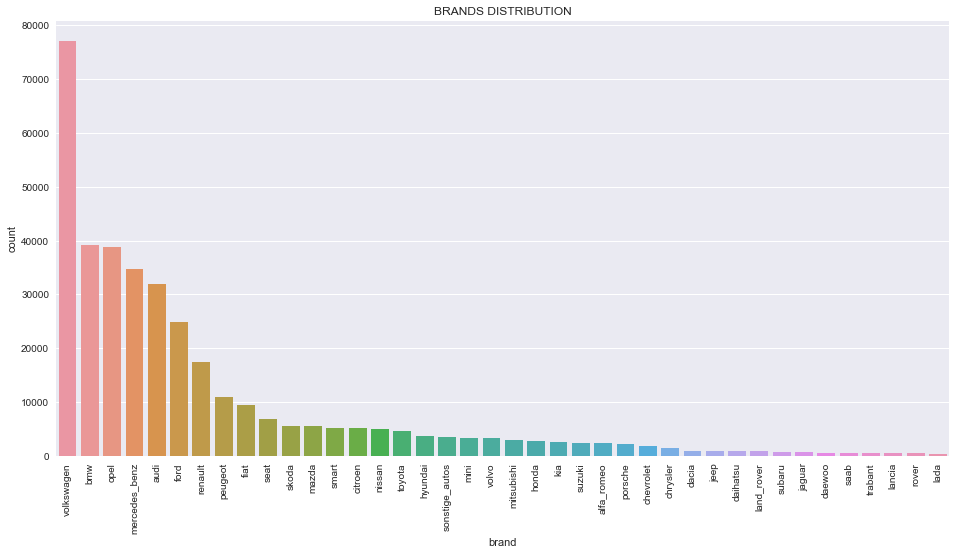

In [16]:
plt.figure(figsize=(16,8))
plt.title('BRANDS DISTRIBUTION')
# Order categories by count
brand_count = sns.countplot(x = 'brand',
              data = df2,
              order = df2['brand'].value_counts().index)
brand = brand_count.set_xticklabels(brand_count.get_xticklabels(), rotation=90)

*Based on the above visualization, this column has 40 different brands having consistent records which can be useful for the model. **Volkswagen** is the most popular one and **BMW** is the next popular brand to be considered among all.*

#### What is the average price of Volkswagen ? How many cars of 'Volkswagen' brand are on sale ? 

In [17]:
volkswagen_cars = df2[df2.brand =='volkswagen']
print('Number of Volkswagen cars on sale is:',len(volkswagen_cars),'and the mean price is',
       int(np.mean(volkswagen_cars.price)), 'Euros.')

Number of Volkswagen cars on sale is: 77039 and the mean price is 15024 Euros.


#### Which is the most running model in Volkswagen ? 

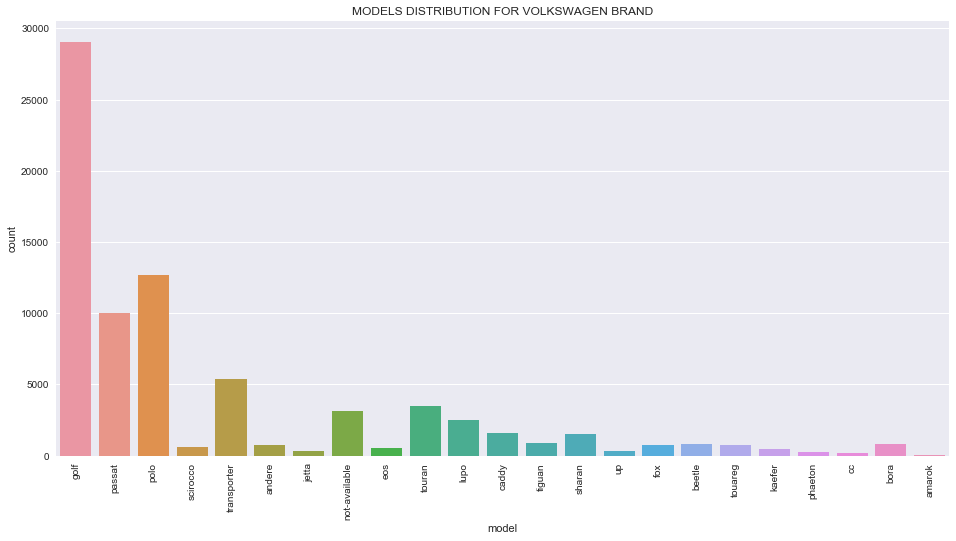

In [18]:
plt.figure(figsize=(16,8))
plt.title('MODELS DISTRIBUTION FOR VOLKSWAGEN BRAND')
model_count = sns.countplot(volkswagen_cars['model'])
model = model_count.set_xticklabels(model_count.get_xticklabels(), rotation=90)

*From the above 'MODELS DISTRIBUTION FOR VOLKSWAGEN BRAND', we can see that **golf** is the most popular and running model in  Volkswagen. Next, we can see is **polo** which the second competitor model.*

#### Which vehicle type has maximum number of automatic transmission ?

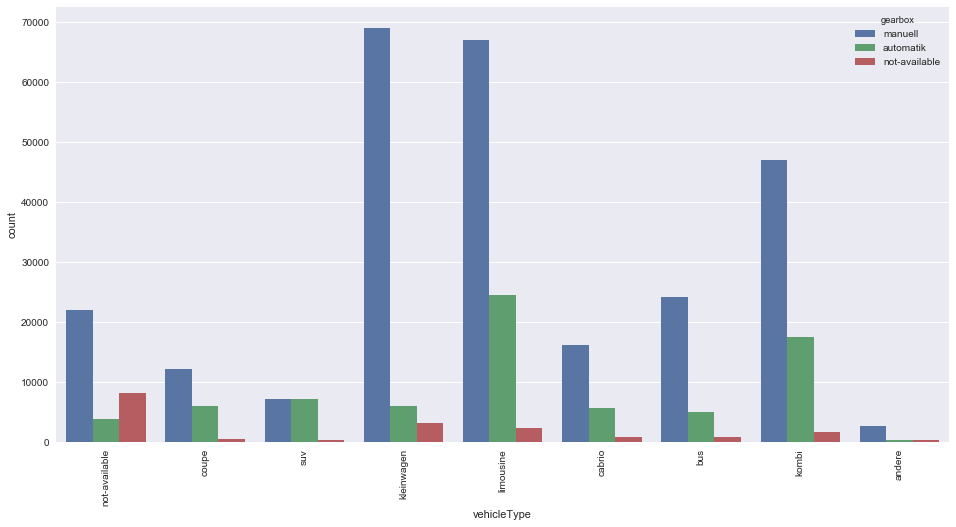

In [19]:
plt.figure(figsize=(16,8))
vT_gb = sns.countplot(x='vehicleType', hue='gearbox', data=df2)
vg = vT_gb.set_xticklabels(vT_gb.get_xticklabels(), rotation=90)

*Based on the above graph, we can say that **Limousine** shows the maximum number of automatic transmission as compared with **Kombi**.*

#### What is the min, max and average horse power of different vehichle type ?

In [20]:
group_vT = df2.groupby('vehicleType').agg({"powerPS": [min, max, mean]}) 
# Using ravel, and a string join, we can create better names for the columns:
group_vT.columns = ["_".join(x) for x in group_vT.columns.ravel()]
group_vT

,powerPS_min,powerPS_max,powerPS_mean
vehicleType,,,
andere,0,12684,102.846910
bus,0,12512,114.009271
cabrio,0,16312,145.921410
coupe,0,20000,174.278791
kleinwagen,0,15020,68.992328
kombi,0,19312,136.838470
limousine,0,19211,132.636122
not-available,0,16011,73.757670
suv,0,17322,166.731899


PowerPS_min with zero is not a valid value for the feature. So, rows having 0 powerPS can be removed to have better data understanding.